<a href="https://colab.research.google.com/github/MariaMitrankova/Community-Detection-in-Procurement/blob/main/Cartel_and_Corruption_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a second part of the paper, includes applications for community detection in practice.

Load Dataset

In [1]:
import pandas as pd
auctions = pd.read_csv("/content/drive/MyDrive/Maria Mitrankova/updated.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,8,22,25,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
auctions['start_date'] = pd.to_datetime(auctions['start_date'])

In [3]:
auctions['date'] = pd.to_datetime(auctions['date'])
auctions['end_date'] = pd.to_datetime(auctions['end_date'])

In [ ]:
auctions.head()

,Unnamed: 0,purchase_number,region,procurer_reg_num,max_price,currency,start_date,end_date,prolong_date,n_commission_members,...,won,con.win,sel_num,sel.period,au.reserve,au.duration,auciton_id,com_n,sus,com
0,1299922,3.421000e+17,Samarskaja_obl,3.421000e+09,163463.3,NaN,2014-01-28 08:00:00,2014-01-31 16:00:00,NaN,4,...,True,0.999999,1,1,0.326927,3,603231,0,False,False
1,829607,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.0,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,False,0.000000,193,1966,0.191380,3,373738,0,False,False
2,829606,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.0,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,True,0.034483,47,2599,0.191380,3,373738,0,False,False
3,829608,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.0,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,False,0.000000,42,2497,0.191380,3,373738,0,False,False
4,829609,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.0,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,False,0.000000,258,2123,0.191380,3,373738,0,False,False


In [ ]:
auctions[auctions['com_n'] != -1].groupby(['participant_inn'])['start_date'].diff().median()

Timedelta('8 days 01:00:00')

In [4]:
auctions['year'] = auctions['start_date'].dt.year

In [ ]:
auctions.groupby('com_n')['year'].nunique().mean()

1.825618000722506

In [ ]:
auctions.head()

,Unnamed: 0,purchase_number,region,procurer_reg_num,max_price,currency,start_date,end_date,prolong_date,n_commission_members,...,won,con.win,sel_num,sel.period,au.reserve,au.duration,auciton_id,com_n,sus,com
0,1299922,3.421000e+17,Samarskaja_obl,3.421000e+09,163463.3,NaN,2014-01-28 08:00:00,2014-01-31 16:00:00,NaN,4,...,True,0.999999,1,1,0.326927,3,603231,0,False,False
1,829607,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.0,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,False,0.000000,193,1966,0.191380,3,373738,0,False,False
2,829606,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.0,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,True,0.034483,47,2599,0.191380,3,373738,0,False,False
3,829608,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.0,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,False,0.000000,42,2497,0.191380,3,373738,0,False,False
4,829609,3.323003e+17,Nizhegorodskaja_obl,3.323003e+09,95690.0,NaN,2014-02-10 08:00:00,2014-02-13 16:30:00,NaN,5,...,False,0.000000,258,2123,0.191380,3,373738,0,False,False


In [5]:
import matplotlib.pyplot as plt


In [10]:
auctions.loc[(~auctions['participant_inn'].isin(gr_ns['participant_inn'])), ['com_n']] = -1

In [15]:
auctions = auctions[auctions['com_n'] != -1] # remove only single-bidders firms

In [ ]:
import networkx as nx
!pip install cdlib
from cdlib import algorithms

Distribution of metrics in competitive vs. noncompetitive markets

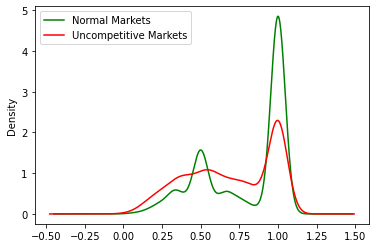

In [ ]:
fig, ax = plt.subplots(1,1)
auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean().plot.density(color='green', ax=ax, label='Normal Markets')
auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean().plot.density(color='red', ax=ax, label='Uncompetitive Markets')
ax.legend()

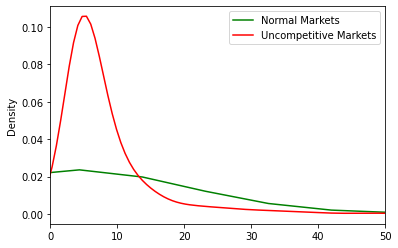

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,50])
auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean().plot.density(color='green', ax=ax, label='Normal Markets')
auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean().plot.density(color='red', ax=ax, label='Uncompetitive Markets')
ax.legend()

In [ ]:
auctions[auctions['sus'] & (auctions['com_n'] != -1)]['com_n'].nunique()

2005

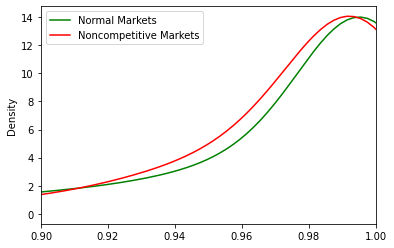

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.9,1])
auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal Markets')
auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Noncompetitive Markets')
plt.legend()

In [ ]:
print(auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().std(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().median())
print(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().std(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean().mean())
mannwhitneyu(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_price'].mean())

0.9552790587730157 0.10583125397575209 0.9935767916120197
0.9628193854221175 0.08436137089754439 0.9628193854221175


MannwhitneyuResult(statistic=5671055.0, pvalue=1.3796884735631112e-06)

In [ ]:
print(auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean().mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean().std(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean().median())
print(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean().mean(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean().std(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean().median())
mannwhitneyu(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean())

2 days 01:30:27.521379907 2 days 00:50:50.643169315 1 days 12:23:29.217362491
2 days 07:44:05.409363449 1 days 12:09:32.087915196 2 days 02:53:58.647058823


MannwhitneyuResult(statistic=4998114.5, pvalue=7.845880699092166e-34)

In [ ]:
from scipy.stats import mannwhitneyu
print(auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean().mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean().std(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean().median())
print(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean().mean(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean().std(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean().median())
mannwhitneyu(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['con.win'].mean())

0.7873634791483152 0.26634359284875875 0.999999000001
0.6912274161607703 0.2788067198308037 0.6999998833333527


MannwhitneyuResult(statistic=5688845.5, pvalue=4.18588329296211e-06)

In [ ]:
auctions['sev_times'] = auctions.groupby('com_n')['auction_id'].transform('nunique') > 1

In [ ]:
from scipy.stats import mannwhitneyu
print(auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean().mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean().std(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean().median())
print(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean().mean(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean().std(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean().median())
mannwhitneyu(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].mean())

7.29827377061092 93.21953951011878 3.0
8.345282442520144 11.00584104296092 6.0


MannwhitneyuResult(statistic=2408409.0, pvalue=0.0)

In [ ]:
from scipy.stats import mannwhitneyu
print(auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean().mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean().std(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean().median())
print(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean().mean(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean().std(), auctions[(auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean().median())
mannwhitneyu(auctions[(auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean(), auctions[(~auctions['sus']) & (auctions['single']) & (auctions['sel_num'] > 1) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean())

7.717404846203268 2.500171148036499 7.0
7.85346011950237 1.7223894874265315 7.666666666666667


MannwhitneyuResult(statistic=5379263.0, pvalue=1.4517470447924991e-15)

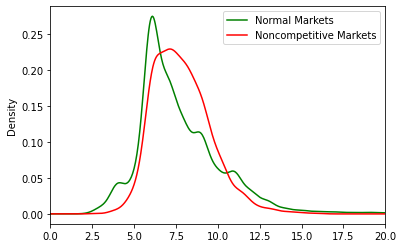

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,20])
auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean().plot.density(color='green', ax=ax, label='Normal Markets')
auctions[(auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['au.duration'].mean().plot.density(color='red', ax=ax, label='Noncompetitive Markets')
ax.legend()

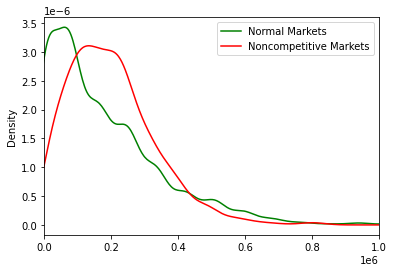

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,1e6])
auctions[(~auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean().dt.total_seconds().astype(int).plot.density(color='green', ax=ax, label='Normal Markets')
auctions[(auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['bid_date'].mean().dt.total_seconds().astype(int).plot.density(color='red', ax=ax, label='Noncompetitive Markets')
plt.legend()

In [ ]:
auctions['bid_date'] = auctions['end_date'] - auctions['date']

In [6]:
auctions['bid_date'] = pd.to_timedelta(auctions['bid_date'])

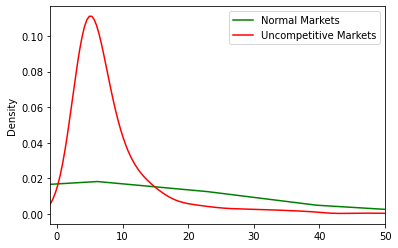

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([-1,50])
auctions[(~auctions['sus']) & (auctions['single'])  & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].median().plot.density(color='green', ax=ax, label='Normal Markets')
auctions[(auctions['sus']) & (auctions['single']) & (auctions['com_n'] != -1)].groupby(['com_n'])['sel_num'].median().plot.density(color='red', ax=ax, label='Uncompetitive Markets')
ax.legend()

In [ ]:
auctions[(~auctions['sus']) & (auctions['single'])][['code_1', 'code_2']].value_counts()

code_1  code_2
32.0    50.0      4795
86.0    90.0      3887
21.0    20.0      2599
33.0    12.0      2437
20.0    59.0      2436
                  ... 
71.0    10.0         1
18.0    23.0         1
38.0    32.0         1
36.0    61.0         1
28.0    71.0         1
Length: 758, dtype: int64

In [118]:
auctions['code'] = auctions['code_1'].map(str) + auctions['code_2'].map(str)

In [ ]:
gr = auctions[['participant_inn', 'auction_id']]
gr_ns = gr[gr.groupby('auction_id')['auction_id'].transform('size') > 1]
gr_ns


In [9]:
G_nw = nx.Graph()
G_nw.add_nodes_from(gr_ns['participant_inn'], bipartite=0)
dct  = gr_ns.groupby('auction_id')['participant_inn'].apply(list).to_dict()
for a in dct:
  for i in range(len(dct[a])):
    for j in range(i+1, len(dct[a])):
      if G_nw.has_edge(dct[a][i], dct[a][j]):
                # we added this one before, just increase the weight by one
        G_nw[dct[a][i]][dct[a][j]]['weight'] += 1
      else:
                # new edge. add with weight=1
        G_nw.add_edge(dct[a][i], dct[a][j], weight=1)
len(G_nw) 

406372

Create features for cartel risk measure

In [161]:
auctions['one_com'] = auctions.groupby('auction_id')['com_n'].transform('nunique') == 1
auctions['cv_price'] = auctions[auctions['one_com'] & auctions['won']].groupby('com_n')['bid_price'].transform('std')


In [162]:
auctions['cv_price'] = auctions['cv_price'] / auctions[auctions['one_com'] & auctions['won']].groupby('com_n')['bid_price'].transform('mean')
auctions['cv_price'] = auctions['cv_price'].fillna(0)

In [13]:
auctions['cv_bidding'] = auctions[auctions['one_com']].groupby(['com_n', 'auction_id'])['price'].transform('std')
auctions['cv_bidding'] = auctions['cv_bidding'] / (auctions[auctions['one_com']].groupby(['com_n', 'auction_id'])['price'].transform('mean') + 1e-6)
auctions['cv_bidding'] = auctions.groupby('com_n')['cv_bidding'].transform('mean')
auctions['cv_bidding'] = auctions['cv_bidding'].fillna(0)

In [14]:
auctions['bid_date']= (auctions['bid_date']).dt.total_seconds()

auctions['cv_date'] = auctions[auctions['one_com']].groupby(['com_n', 'auction_id'])['bid_date'].transform('std')
auctions['cv_date'] = auctions['cv_date'] / (auctions[auctions['one_com']].groupby(['com_n', 'auction_id'])['bid_date'].transform('mean') + 1e-6)
auctions['cv_date'] = auctions.groupby('com_n')['cv_date'].transform('mean')
auctions['cv_date'] = auctions['cv_date'].fillna(0)

In [ ]:
auctions['code'] = auctions['code_1'].map(str) + auctions['code_2'].map(str)

In [ ]:
auctions['year'].max()

1990

Stability Metric

In [16]:
auctions['year'] = auctions['start_date'].dt.year
auctions['month'] = auctions['start_date'].dt.month

def stability(com_n):
  comsx = auctions[(auctions['com_n'] == com_n) & auctions['one_com']]
  start_y = comsx['year'].min()
  end_y = comsx['year'].max()
  firms_l = []
  for k in range(start_y, end_y):
    for j in range(1, 13):
      firms = comsx[(comsx['year'] == k) & (comsx['month'] == j)]['participant_inn'].unique().tolist()
      if len(firms) > 0:
        firms_l.append(set(firms))

  ns_w = []
  if len(firms_l) <= 1:
    return [1]
  
  #print(len(firms_l))
  for i in range(len(firms_l)-1):
    ws1 = []
    com1 = G_nw.subgraph(firms_l[i] | firms_l[i+1]).copy()
    for e in com1.edges():
      if e[0] in firms_l[i] and e[1] in firms_l[i]:
        ws1.append(com1.get_edge_data(*e)['weight'])
      else:
        ws1.append(0)
    ws1 = np.array(ws1, dtype=np.float64)
  #  print(ws1)
    ws2 = []
    # com2 = G_n.subgraph(communs[k+1][found[c]]).copy()
    for e in com1.edges():
      if e[0] in firms_l[i+1] and e[1] in firms_l[i+1]:
        ws2.append(com1.get_edge_data(*e)['weight'])
      else:
        ws2.append(0)
    ws2 = np.array(ws2, dtype=np.float64)
    ws1_dm = ws1 - np.mean(ws1)
    ws2_dm = ws2 - np.mean(ws2)
    # print(ws1_dm.sum(), ws2_dm.sum())
    wes = (ws1_dm * ws2_dm).sum() / ((((ws1_dm ** 2).sum() * (ws2_dm ** 2).sum()) ** 0.5) + 1e-6)
    ns_w.append(wes)
  
  # nes_w_y.append(ns_w)
  return ns_w

In [17]:
from tqdm import tqdm
import numpy as np 

stabls1 = []
for i in tqdm(range(19376)):
  stabls1.append(stability(i))

100%|██████████| 19376/19376 [10:21<00:00, 31.19it/s]


In [ ]:
from tqdm import tqdm
import numpy as np 

stabls2 = []
for i in tqdm(range(19376)):
  stabls2.append(stability(i))

In [19]:
stabls = np.array(stabls2)
mylen = np.vectorize(len)
mysum = np.vectorize(sum)
stable = [sum(stabls[i])/len(stabls[i]) for i in range(len(stabls))]
mean_st = (mysum(stabls)/mylen(stabls)).mean()

In [22]:
mean_st = stable[151:].mean()

In [ ]:
mean_st

0.7272558357969221

In [ ]:
firms = auctions[auctions['is_cartel_firm']==1]['firm'].unique().tolist()

In [23]:
auctions['stable'] = (stable[auctions['com_n']] > mean_st) & (stabls[auctions['com_n']][0] != 1)
auctions[auctions['stable']]

,Unnamed: 0,purchase_number,region,procurer_reg_num,max_price,currency,start_date,end_date,prolong_date,n_commission_members,...,com_n,sus,com,year,one_com,cv_price,cv_bidding,cv_date,month,stable
32,1658429,3.023000e+17,Burjatija_Resp,3.023000e+09,248650.99,NaN,2014-04-21 08:00:00,2014-04-24 17:00:00,NaN,5,...,4826,False,False,2014,True,0.000000,0.010997,0.014866,4,True
33,1658430,3.023000e+17,Burjatija_Resp,3.023000e+09,248650.99,NaN,2014-04-21 08:00:00,2014-04-24 17:00:00,NaN,5,...,4826,False,False,2014,True,0.000000,0.010997,0.014866,4,True
46,2495439,1.873000e+17,Khanty-Mansijskij_AO-Jugra_AO,1.873000e+09,445200.00,NaN,2014-05-07 09:00:00,2014-05-23 09:00:00,NaN,3,...,84,False,False,2014,True,0.000000,0.078270,0.471408,5,True
48,2495438,1.873000e+17,Khanty-Mansijskij_AO-Jugra_AO,1.873000e+09,445200.00,NaN,2014-05-07 09:00:00,2014-05-23 09:00:00,NaN,3,...,84,False,False,2014,True,0.000000,0.078270,0.471408,5,True
49,2495440,1.873000e+17,Khanty-Mansijskij_AO-Jugra_AO,1.873000e+09,445200.00,NaN,2014-05-07 09:00:00,2014-05-23 09:00:00,NaN,3,...,84,False,False,2014,True,1.085352,0.078270,0.471408,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375510,3700457,3.463000e+17,Lipeckaja_obl,3.463000e+09,135020.64,RUB,2021-12-30 17:52:45,2022-01-14 09:00:00,NaN,3,...,24,False,False,2021,True,1.210562,0.259549,0.793615,12,True
3375578,3160696,3.303000e+17,Vologodskaja_obl,3.303000e+09,674780.80,RUB,2021-12-30 18:49:07,2022-01-14 00:00:00,NaN,3,...,24,False,False,2021,True,1.210562,0.259549,0.793615,12,True
3375725,3202809,3.731001e+17,Moskva,3.731001e+09,500000.00,RUB,2021-12-31 14:08:08,2022-01-14 11:00:00,NaN,3,...,84,False,False,2021,True,0.000000,0.078270,0.471408,12,True
3375726,3202808,3.731001e+17,Moskva,3.731001e+09,500000.00,RUB,2021-12-31 14:08:08,2022-01-14 11:00:00,NaN,3,...,84,False,False,2021,True,1.085352,0.078270,0.471408,12,True


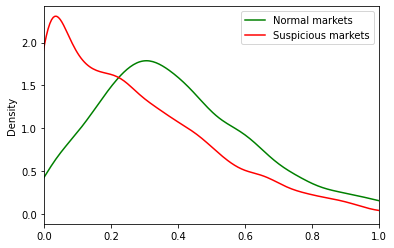

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,1)
ax.set_xlim([0,1])
auctions[(~auctions['stable'])  & (auctions['com_n'] >= 151) & auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

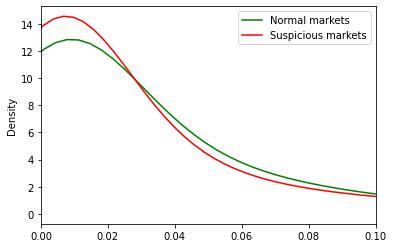

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,0.1])
auctions[(~auctions['stable'])  & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
ax.legend()

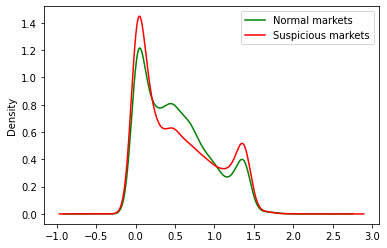

In [ ]:
fig, ax = plt.subplots(1,1)
# ax.set_xlim([0,1e4])
auctions[(~auctions['stable'])  & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
ax.legend()

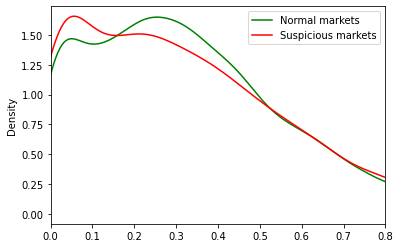

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,0.8])
auctions[(~auctions['cartel'])  & (auctions['com_n'] >= 151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['cartel']) & (auctions['com_n']  >= 151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

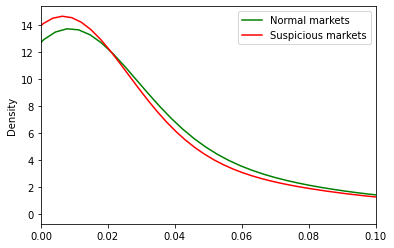

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,0.1])
auctions[(~auctions['cartel'])  & (auctions['com_n'] >= 151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['cartel']) & (auctions['com_n']  >= 151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
ax.legend()

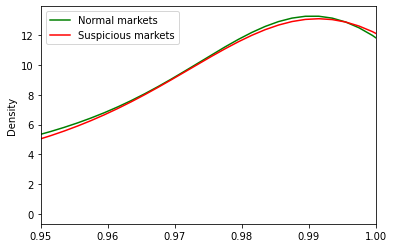

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.95,1])
auctions[(~auctions['cartel'])  & (auctions['com_n'] >= 151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['cartel']) & (auctions['com_n']  >= 151) & auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
ax.legend()

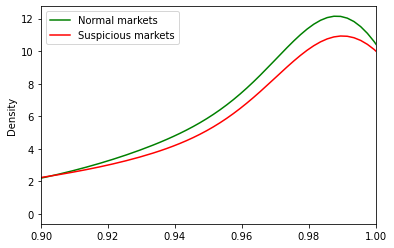

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.9,1])
auctions[(~auctions['stable'])  & (auctions['com_n']  >= 151) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['stable']) & (auctions['com_n']  >= 151) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
ax.legend()

Cartel Suspicious

In [25]:
f = open("/content/drive/MyDrive/Maria Mitrankova/demofile5.txt", "r")
s = ''
for l in f.readlines():
  s += l

s 
similar = set(map(int, s.split()))

In [26]:
susp = similar

In [27]:
auctions['cartel'] = auctions['com_n'].isin(susp)

In [ ]:
auctions[auctions['cartel']]

,Unnamed: 0,purchase_number,region,procurer_reg_num,max_price,currency,start_date,end_date,prolong_date,n_commission_members,...,year,code,month,one_com,cv_price,cv_bidding,stable,coherent,exclusive,cartel
51,1383832,3.583000e+17,Rostovskaja_obl,3.583000e+09,4140.80,NaN,2014-05-08 09:00:00,2014-05-15 17:00:00,NaN,5,...,2014,nannan,5,True,NaN,NaN,True,True,True,True
52,1383833,3.583000e+17,Rostovskaja_obl,3.583000e+09,4140.80,NaN,2014-05-08 09:00:00,2014-05-15 17:00:00,NaN,5,...,2014,nannan,5,True,NaN,NaN,True,True,True,True
316,1038887,1.513000e+17,Novosibirskaja_obl,1.513000e+09,23940.00,NaN,2014-05-27 11:00:00,2014-06-02 18:00:00,NaN,4,...,2014,nannan,5,True,0.565409,0.565422,True,True,True,True
396,1730071,1.013000e+17,Bashkortostan_Resp,1.013000e+09,65400.00,NaN,2014-05-28 11:00:00,2014-06-03 11:00:00,NaN,5,...,2014,nannan,5,True,0.523060,0.523059,False,True,True,True
460,1936264,3.051000e+17,Kalmykija_Resp,3.051000e+09,25746.34,NaN,2014-05-29 09:00:00,2014-06-04 15:00:00,NaN,5,...,2014,nannan,5,True,1.086078,1.106968,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374811,3345094,3.873001e+17,Khanty-Mansijskij_AO-Jugra_AO,3.873001e+09,173520.00,RUB,2021-12-29 14:17:17,2022-01-13 08:30:00,NaN,3,...,2021,71.012.0,12,True,NaN,NaN,True,True,True,True
3374812,3345093,3.873001e+17,Khanty-Mansijskij_AO-Jugra_AO,3.873001e+09,173520.00,RUB,2021-12-29 14:17:17,2022-01-13 08:30:00,NaN,3,...,2021,71.012.0,12,True,NaN,NaN,True,True,True,True
3374813,3345092,3.873001e+17,Khanty-Mansijskij_AO-Jugra_AO,3.873001e+09,173520.00,RUB,2021-12-29 14:17:17,2022-01-13 08:30:00,NaN,3,...,2021,71.012.0,12,True,NaN,NaN,True,True,True,True
3375191,4198276,3.612000e+17,Sakhalinskaja_obl,3.612000e+09,86818.49,RUB,2021-12-30 09:44:12,2022-01-17 16:00:00,NaN,3,...,2021,62.02.0,12,True,0.378012,0.379391,False,True,True,True


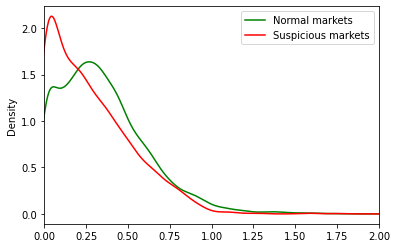

In [ ]:

fig, ax = plt.subplots(1,1)
ax.set_xlim([0,2])
auctions[(~(auctions['stable'] & auctions['cartel']))   & (auctions['com_n'] != -1)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['stable']) & (auctions['com_n'] != -1) & (auctions['cartel']) & auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

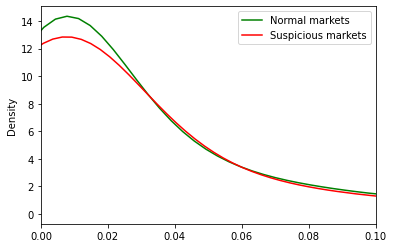

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,0.10000])
auctions[(~(auctions['stable'] & auctions['cartel']))  & (auctions['com_n'] != -1)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['stable']) & (auctions['com_n'] != -1) & (auctions['cartel'])& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

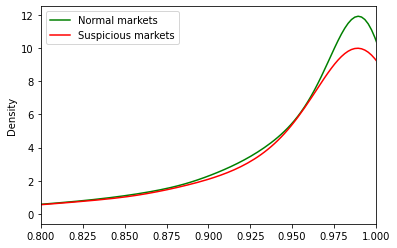

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.8,1])
auctions[~(auctions['stable'] & auctions['cartel'])  & (auctions['com_n'] != -1) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['stable']) & (auctions['com_n'] != -1) & (auctions['cartel']) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
ax.legend()

Coherence & Exclusivity

In [24]:
import numpy as np
from tqdm import tqdm 

coherence = []
for i in tqdm(range(19376)):
  firms = auctions[auctions['com_n'] == i]['participant_inn'].unique().tolist()
  com = G_nw.subgraph(firms).copy()
  w = []
  for e in com.edges():
    w.append(com.get_edge_data(*e)['weight'])
  w = np.array(w, dtype=np.float64)
  ch = np.clip(np.prod(w), 0, 1e6) ** (1/len(w)) / (np.mean(w) + 1e-6)
  if np.isnan(ch):
    print(w)
  coherence.append(ch)

100%|██████████| 19376/19376 [02:52<00:00, 112.19it/s]


In [ ]:
f = open("/content/drive/MyDrive/Maria Mitrankova/demofile4.txt", "r")
s = ''
for l in f.readlines():
  s += l

s 

In [30]:
exclusivity = list(map(float,s.lstrip('[').rstrip(']').split(',')))

In [31]:
exclusivity = np.array(exclusivity)
coherence = np.array(coherence)

In [32]:
auctions['coherence'] = coherence[auctions['com_n']]
auctions['exclusivity'] = exclusivity[auctions['com_n']]

In [33]:
auctions['coherent'] = coherence[auctions['com_n']] >= np.mean(coherence[151:])
auctions[auctions['coherent']]

,Unnamed: 0,purchase_number,region,procurer_reg_num,max_price,currency,start_date,end_date,prolong_date,n_commission_members,...,one_com,cv_price,cv_bidding,cv_date,month,stable,cartel,coherence,exclusivity,coherent
21,2030068,8.101000e+17,Severnaja_Osetija-Alanija_Resp,8.101000e+09,235232.91,NaN,2014-04-08 00:00:00,2014-04-17 18:00:00,NaN,4,...,True,1.073233,0.032387,0.296322,4,False,False,0.999999,1.0,True
32,1658429,3.023000e+17,Burjatija_Resp,3.023000e+09,248650.99,NaN,2014-04-21 08:00:00,2014-04-24 17:00:00,NaN,5,...,True,0.000000,0.010997,0.014866,4,True,False,0.999999,1.0,True
33,1658430,3.023000e+17,Burjatija_Resp,3.023000e+09,248650.99,NaN,2014-04-21 08:00:00,2014-04-24 17:00:00,NaN,5,...,True,0.000000,0.010997,0.014866,4,True,False,0.999999,1.0,True
51,1383832,3.583000e+17,Rostovskaja_obl,3.583000e+09,4140.80,NaN,2014-05-08 09:00:00,2014-05-15 17:00:00,NaN,5,...,True,0.000000,0.017586,1.105977,5,True,True,0.999999,1.0,True
52,1383833,3.583000e+17,Rostovskaja_obl,3.583000e+09,4140.80,NaN,2014-05-08 09:00:00,2014-05-15 17:00:00,NaN,5,...,True,0.000000,0.017586,1.105977,5,True,True,0.999999,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375258,3664255,3.423000e+17,Samarskaja_obl,3.423000e+09,222190.00,RUB,2021-12-30 11:36:02,2022-01-14 06:00:00,NaN,3,...,True,0.000000,0.006153,0.505076,12,False,False,0.999999,1.0,True
3375259,3664254,3.423000e+17,Samarskaja_obl,3.423000e+09,222190.00,RUB,2021-12-30 11:36:02,2022-01-14 06:00:00,NaN,3,...,True,1.653139,0.006153,0.505076,12,False,False,0.999999,1.0,True
3375318,3112643,1.663000e+17,Tulskaja_obl,1.663000e+09,245000.00,RUB,2021-12-30 12:51:04,2022-01-14 10:00:00,NaN,3,...,True,0.526995,0.056318,0.321428,12,True,False,0.999999,1.0,True
3375319,3112642,1.663000e+17,Tulskaja_obl,1.663000e+09,245000.00,RUB,2021-12-30 12:51:04,2022-01-14 10:00:00,NaN,3,...,True,0.000000,0.056318,0.321428,12,True,False,0.999999,1.0,True


In [ ]:
auctions['exclusive'] = exclusivity[auctions['com_n']] >= 1
auctions[auctions['exclusive']]

,Unnamed: 0,purchase_number,region,procurer_reg_num,max_price,currency,start_date,end_date,prolong_date,n_commission_members,...,cv_date,year,month,stable,sev_times,cartel,coherence,exclusivity,coherent,exclusive
21,2030068,8.101000e+17,Severnaja_Osetija-Alanija_Resp,8.101000e+09,235232.91,NaN,2014-04-08 00:00:00,2014-04-17 18:00:00,NaN,4,...,0.296322,2014,4,False,True,False,0.999999,1.0,True,True
32,1658429,3.023000e+17,Burjatija_Resp,3.023000e+09,248650.99,NaN,2014-04-21 08:00:00,2014-04-24 17:00:00,NaN,5,...,0.014866,2014,4,True,False,False,0.999999,1.0,True,True
33,1658430,3.023000e+17,Burjatija_Resp,3.023000e+09,248650.99,NaN,2014-04-21 08:00:00,2014-04-24 17:00:00,NaN,5,...,0.014866,2014,4,True,False,False,0.999999,1.0,True,True
51,1383832,3.583000e+17,Rostovskaja_obl,3.583000e+09,4140.80,NaN,2014-05-08 09:00:00,2014-05-15 17:00:00,NaN,5,...,1.105977,2014,5,True,False,True,0.999999,1.0,True,True
52,1383833,3.583000e+17,Rostovskaja_obl,3.583000e+09,4140.80,NaN,2014-05-08 09:00:00,2014-05-15 17:00:00,NaN,5,...,1.105977,2014,5,True,False,True,0.999999,1.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375319,3112642,1.663000e+17,Tulskaja_obl,1.663000e+09,245000.00,RUB,2021-12-30 12:51:04,2022-01-14 10:00:00,NaN,3,...,0.321428,2021,12,True,True,False,0.999999,1.0,True,True
3375392,3966470,2.081000e+17,Marij_El_Resp,2.081000e+09,64200.00,RUB,2021-12-30 14:40:34,2022-01-14 12:00:00,NaN,3,...,0.718975,2021,12,True,True,False,0.866025,1.0,False,True
3375393,3966469,2.081000e+17,Marij_El_Resp,2.081000e+09,64200.00,RUB,2021-12-30 14:40:34,2022-01-14 12:00:00,NaN,3,...,0.718975,2021,12,True,True,False,0.866025,1.0,False,True
3375482,4644438,1.131000e+17,Udmurtskaja_Resp,1.131000e+09,50000.00,RUB,2021-12-30 16:49:38,2022-01-14 10:00:00,NaN,5,...,0.449115,2021,12,False,True,False,0.567295,1.0,False,True


In [ ]:
auctions['participant_inn'].nunique()

480787

In [ ]:
auctions[(auctions['com_n'] >= 151) & (auctions['stable']) & auctions['cartel'] & auctions['coherent'] & auctions['exclusive'] & auctions['sev_times']].groupby('com_n')['participant_inn'].nunique().value_counts()

2    1615
3      96
4      11
Name: participant_inn, dtype: int64

Evaluate differences between suspicious and normal markets

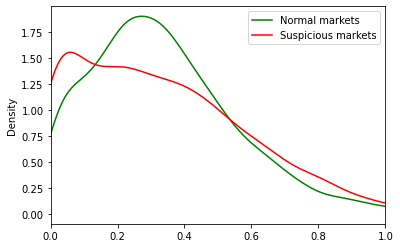

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,1])
auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])  & (auctions['com_n']>=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >=151) & (auctions['cartel'])& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

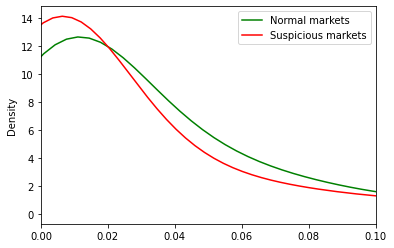

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0, 0.1])
auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])  & (auctions['com_n'] >= 151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >= 151) & (auctions['cartel'])& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density( color='red', ax=ax, label='Suspicious markets')
plt.legend()

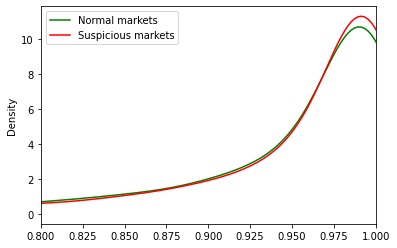

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.8,1])
auctions[(auctions['exclusive'] & auctions['coherent'] )& (~auctions['cartel'] )  & (auctions['com_n'] != -1) & auctions['won']].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] != -1) & (auctions['cartel']) & auctions['won']].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

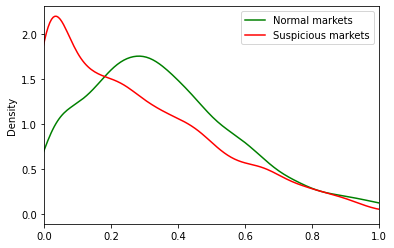

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,1])
auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['stable']))  & (auctions['com_n'] >= 151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >= 151) & (auctions['stable'])& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

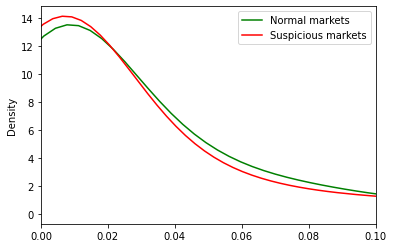

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,0.1])
auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['stable']))  & (auctions['com_n'] >= 151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >= 151) & (auctions['stable'])& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

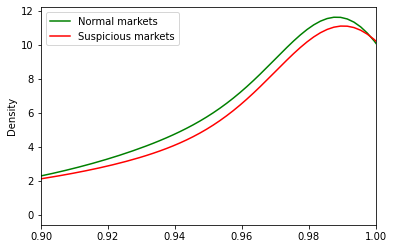

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.9,1])
auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['stable']) )  & (auctions['com_n'] >= 151) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >= 151) & (auctions['stable']) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

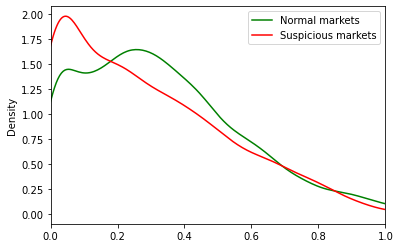

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,1])
auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'] & auctions['cartel']))  & (auctions['com_n'] >= 151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >= 151) & (auctions['stable']) & (auctions['cartel'])& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

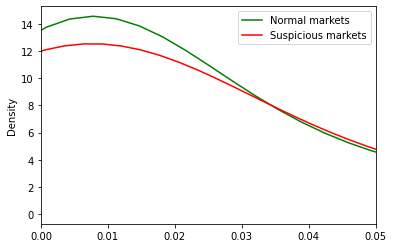

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,0.05])
auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'] & auctions['cartel']))& auctions['sev_times'] & (auctions['com_n'] >= 151) ].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent'])  & (auctions['stable']) & (auctions['cartel'])& auctions['sev_times'] & (auctions['com_n'] >= 151)].groupby(['com_n'])['cv_bidding'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

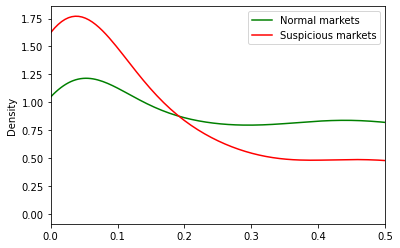

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,0.5])
auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['stable']))  &  (auctions['com_n'] >=151)].groupby(['com_n'])['cv_date'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >=151) & (auctions['stable']) ].groupby(['com_n'])['cv_date'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

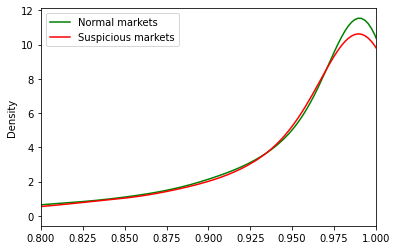

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.8,1])
auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'] & auctions['cartel'] )& auctions['won'])  & (auctions['com_n'] >= 150)].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >= 150) & (auctions['stable']) & (auctions['cartel']) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

In [ ]:
from scipy.stats import mannwhitneyu
auctions = auctions[auctions['com_n'] != -1]
print(auctions[(auctions['stable']) & (auctions['won'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(auctions['stable']) & (auctions['won'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().std(), auctions[(auctions['stable']) & (auctions['won'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().median())
print(auctions[(~auctions['stable'])& (auctions['won'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().mean(), auctions[~(auctions['stable'])& (auctions['won'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().std(), auctions[(~auctions['stable']) & (auctions['won'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().median())
mannwhitneyu(auctions[(auctions['stable'])& (auctions['won'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean(), auctions[(~auctions['stable'])& (auctions['won'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean())

0.9383662487314336 0.11245501551820687 0.9773569108198228
0.9459380126291413 0.09077949023258379 0.9748306635723853


MannwhitneyuResult(statistic=13369117.5, pvalue=0.01723771072616993)

In [ ]:
from scipy.stats import mannwhitneyu
auctions = auctions[auctions['com_n'] != -1]
print(auctions[(auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().mean(), auctions[(auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().std(), auctions[(auctions['stable'])  & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().median())
print(auctions[(~auctions['stable'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().mean(), auctions[~(auctions['stable'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().std(), auctions[(~auctions['stable'])  & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().median())
mannwhitneyu(auctions[(auctions['stable'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean(), auctions[(~auctions['stable'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean())

0.2696829622719108 0.23813471735659586 0.21990897563296752
0.413049725850689 0.268268795894072 0.3671049621294794


MannwhitneyuResult(statistic=9000579.5, pvalue=3.931607302040118e-202)

In [ ]:
auctions = auctions[auctions['com_n'] != -1]
print(auctions[(auctions['stable'])  & (auctions['com_n'] >=151)& auctions['sev_times']& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[(auctions['stable'])  & (auctions['com_n'] >=151)].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[(auctions['stable']) & (auctions['won']) & (auctions['com_n'] >=151)].groupby(['com_n'])['cv_bidding'].mean().median())
print(auctions[(~auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[~(auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[(~auctions['stable']) & (auctions['won']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().median())
mannwhitneyu(auctions[(auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean(), auctions[(~auctions['stable']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean())

0.038133432720263837 0.10600741627261262 0.007944650670093256
0.04286910882061732 0.11246425969873391 0.011884147582927237


MannwhitneyuResult(statistic=12847501.0, pvalue=2.0430589975100988e-08)

In [ ]:
print(auctions[(auctions['cartel']) & (auctions['won']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(auctions['cartel']) & (auctions['won']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().std(), auctions[(auctions['cartel']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().median())
print(auctions[(~auctions['cartel'])& (auctions['won']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().mean(), auctions[~(auctions['cartel'])& (auctions['won']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().std(), auctions[(~auctions['cartel']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().median())
print(mannwhitneyu(auctions[(auctions['cartel'])& (auctions['won']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean(), auctions[(~auctions['cartel'])& (auctions['won']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean()))

print(auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().mean(), auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['cv_price'].mean().std(), auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['cv_price'].mean().median())
print(auctions[(~auctions['cartel'])].groupby(['com_n'])['cv_price'].mean().mean(), auctions[~(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().std(), auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().median())
print(mannwhitneyu(auctions[(auctions['cartel'])].groupby(['com_n'])['cv_price'].mean(), auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean()))

print(auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['cv_bidding'].mean().median())
print(auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[~(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().median())
print(mannwhitneyu(auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean(), auctions[(~auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean()))

print(auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().mean(), auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().std(), auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['coherence'].mean().median())
print(auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().mean(), auctions[~(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().std(), auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().median())
print(mannwhitneyu(auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean(), auctions[(~auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean()))

print(auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().mean(), auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().std(), auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['coherence'].mean().median())
print(auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().mean(), auctions[~(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().std(), auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean().median())
print(mannwhitneyu(auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean(), auctions[(~auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['coherence'].mean()))

print(auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['exclusivity'].mean().mean(), auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['exclusivity'].mean().std(), auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['exclusivity'].mean().median())
print(auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['exclusivity'].mean().mean(), auctions[~(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['exclusivity'].mean().std(), auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['exclusivity'].mean().median())
mannwhitneyu(auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['exclusivity'].mean(), auctions[(~auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['exclusivity'].mean())




0.9472861331078093 0.10136992239706967 0.9818925751548158
0.9393629395902696 0.10399209887921149 0.975
MannwhitneyuResult(statistic=10584277.5, pvalue=6.483965648334562e-17)
0.3277520923802639 0.26797205193925294 0.281188661524475
0.20399689814453847 0.25946910897604025 0.2989984141101332
MannwhitneyuResult(statistic=11819767.0, pvalue=0.0)
0.03548723714894852 0.0953650928925172 0.007188371953452161
0.04241275148857817 0.11483447017373809 0.011103112756020779
MannwhitneyuResult(statistic=10504983.5, pvalue=5.0874607760637355e-19)
0.98460383551617 0.04728184743717938 0.9999990000010001
0.9533727485139485 0.09236626334901 0.9999990000010001
MannwhitneyuResult(statistic=9627668.5, pvalue=1.0907785472246402e-53)
0.98460383551617 0.04728184743717938 0.9999990000010001
0.9533727485139485 0.09236626334901 0.9999990000010001
MannwhitneyuResult(statistic=9627668.5, pvalue=1.0907785472246402e-53)
0.9999841255409944 0.0005238757032151278 1.0
0.9995483752670612 0.004438047299308177 1.0


MannwhitneyuResult(statistic=11588941.5, pvalue=3.713494597202278e-12)

In [ ]:
print(auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().mean(), auctions[(auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().std(), auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['cv_date'].mean().median())
print(auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().mean(), auctions[~(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().std(), auctions[(~auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().median())
print(mannwhitneyu(auctions[(auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean(), auctions[(~auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean()))

0.5135061212790457 0.4790233224171222 0.391276723899041
0.5232597221381898 0.4391378310031327 0.44852183691306413
MannwhitneyuResult(statistic=11317915.5, pvalue=0.0007815742204398982)


In [ ]:
print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().std()), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().median())
print(auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean().mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean().std())
print(mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean()))

print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable']) ].groupby(['com_n'])['cv_price'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable']) ].groupby(['com_n'])['cv_price'].mean().std())
print(auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean().mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean().std())
print(mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean()))

print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable']) ].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable']) ].groupby(['com_n'])['cv_bidding'].mean().std())
print(auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])].groupby(['com_n'])['cv_bidding'].mean().std())
mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])].groupby(['com_n'])['cv_bidding'].mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'])].groupby(['com_n'])['cv_bidding'].mean())

0.9305713574176674 0.13018404289733185
0.9403623256316911 0.10039685995878948
MannwhitneyuResult(statistic=38776000.5, pvalue=3.548671589214229e-12)
0.43684393902920443 0.3715056431928755
0.556339120680807 0.3485540487853924
MannwhitneyuResult(statistic=16751652.5, pvalue=0.0)
185.22977595838145 10781.873526371532
877.2049995281823 18205.50161971677


MannwhitneyuResult(statistic=16849696.0, pvalue=0.0)

In [ ]:
print(auctions[(auctions['coherent'] & auctions['exclusive'] & auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().mean(), auctions[(auctions['coherent'] & auctions['exclusive'] & auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().std(), auctions[(auctions['coherent'] & auctions['exclusive'] & auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['cv_date'].mean().median())
print(auctions[(~auctions['coherent'] & auctions['exclusive'] & auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().mean(), auctions[~(auctions['coherent'] & auctions['exclusive'] & auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().std(), auctions[(~auctions['coherent'] & auctions['exclusive'] & auctions['cartel']) & (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean().median())
print(mannwhitneyu(auctions[(auctions['coherent'] & auctions['exclusive'] & auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean(), auctions[(~auctions['coherent'] & auctions['exclusive'] & auctions['cartel'])& (auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_date'].mean()))

0.5245896543797637 0.5015868789502511 0.3738547661579359
0.4622393276519645 0.4335534554530619 0.42433429894070396
MannwhitneyuResult(statistic=740101.0, pvalue=0.3065220375427514)


In [ ]:
print(auctions[(auctions['coherent'] & auctions['exclusive'] & auctions['stable']) & (auctions['com_n'] >=151)].groupby(['com_n'])['cv_date'].mean().mean(), auctions[(auctions['coherent'] & auctions['exclusive'] & auctions['stable']) & (auctions['com_n'] >=151)].groupby(['com_n'])['cv_date'].mean().std(), auctions[(auctions['coherent'] & auctions['exclusive'] & auctions['stable'])& (auctions['com_n'] >=151) ].groupby(['com_n'])['cv_date'].mean().median())
print(auctions[(~auctions['coherent'] & auctions['exclusive'] & auctions['stable']) & (auctions['com_n'] >=151)].groupby(['com_n'])['cv_date'].mean().mean(), auctions[~(auctions['coherent'] & auctions['exclusive'] & auctions['stable'])& (auctions['com_n'] >=151)].groupby(['com_n'])['cv_date'].mean().std(), auctions[(~auctions['coherent'] & auctions['exclusive'] & auctions['stable']) & (auctions['com_n'] >=151)].groupby(['com_n'])['cv_date'].mean().median())
print(mannwhitneyu(auctions[(auctions['coherent'] & auctions['exclusive'] & auctions['stable'])& (auctions['com_n'] >=151)].groupby(['com_n'])['cv_date'].mean(), auctions[(~auctions['coherent'] & auctions['exclusive'] & auctions['stable'])& (auctions['com_n'] >=151)].groupby(['com_n'])['cv_date'].mean()))

0.5186909868341943 0.5057830188821567 0.3478537677013489
0.5179541798576989 0.417459821514699 0.4667993975885293
MannwhitneyuResult(statistic=10101857.5, pvalue=1.8882407815571257e-07)


In [ ]:
print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']&(auctions['com_n'] >=151)& auctions['sev_times']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().std(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().median())
print(auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])& (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])& (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().std(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().median())
print(mannwhitneyu(auctions[(auctions['coherent'] & auctions['cartel'])& (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean(), auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel']&(auctions['com_n'] >=151)& auctions['sev_times']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean()))

print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().std(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().median())
print(auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().mean(), auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().std(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().median())
print(mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean(), auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean()))

print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times'] ].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().median())
print(auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().median())
mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean(), auctions[(~(auctions['exclusive'] & auctions['coherent'])) & (~auctions['cartel'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean())

0.9493569929430921 0.09305335579374031 0.9820315455006534
0.9349921848174357 0.10020996544772284 0.9741099075992615
MannwhitneyuResult(statistic=3296631.0, pvalue=5.846606180386691e-35)
0.34231582194023985 0.2768479887642775 0.42695091463905704
0.34167460359215557 0.23596095168549266 0.46820735999211455
MannwhitneyuResult(statistic=3929799.0, pvalue=0.018305233716752856)
0.03563009631117769 0.09631532911297709 0.007035888369980392
0.043875307621782794 0.09989412457970845 0.01104217924549557


MannwhitneyuResult(statistic=3204393.5, pvalue=1.8651930110030064e-43)

In [ ]:
auctions[auctions['stable'] & auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] &(auctions['com_n'] >=151)& auctions['sev_times']]['participant_inn'].nunique()

3562

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0.8,1])
auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['stable'] & auctions['cartel'] )& auctions['won'])  & (auctions['com_n'] >= 150)].groupby(['com_n'])['bid_price'].mean().plot.density(color='green', ax=ax, label='Normal markets')
auctions[(auctions['exclusive']) & (auctions['coherent']) &  (auctions['com_n'] >= 150) & (auctions['stable']) & (auctions['cartel']) & auctions['won']& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().plot.density(color='red', ax=ax, label='Suspicious markets')
plt.legend()

In [ ]:
print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().std(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().median())
print(auctions[(~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']))& (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean().std(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) & (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean().median())
print(mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])& (auctions['won'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['bid_price'].mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean()))

print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) ].groupby(['com_n'])['cv_price'].mean().std(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().median())
print(auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean().std(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean().median())
print(mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_price'].mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean()))

print(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) ].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().median())
print(auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_bidding'].mean().std(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable']) &(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean().median())
mannwhitneyu(auctions[(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])&(auctions['com_n'] >=151)& auctions['sev_times']].groupby(['com_n'])['cv_bidding'].mean(), auctions[~(auctions['exclusive'] & auctions['coherent'] & auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_bidding'].mean())

0.9450484276679181 0.1226435486004759 0.9817989672035318
0.9411649098507112 0.12083455420023574 0.9750461074163079
MannwhitneyuResult(statistic=11087093.5, pvalue=4.4368663015299557e-07)
0.2882858984307296 0.1935120233169736 0.23570226039551584
0.3438135321094392 0.267971143218426 0.3030457633656632
MannwhitneyuResult(statistic=9022767.5, pvalue=9.056976593371604e-65)
0.036238351130322415 0.09995467223995859 0.00711232386866765
0.0410736863683659 0.1103365702683324 0.010473420360680288


MannwhitneyuResult(statistic=11034138.0, pvalue=8.987669860359026e-08)

In [ ]:
print(auctions[(auctions['cartel'] & auctions['stable']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().mean(), auctions[(auctions['cartel'] & auctions['stable']) & (auctions['won'])].groupby(['com_n'])['bid_price'].mean().std())
print(auctions[~(auctions['cartel'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean().mean(), auctions[~(auctions['cartel'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean().std())
print(mannwhitneyu(auctions[(auctions['cartel'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean(), auctions[~(auctions['cartel'] & auctions['stable'])& (auctions['won'])].groupby(['com_n'])['bid_price'].mean()))

print(auctions[(auctions['cartel'] & auctions['stable']) ].groupby(['com_n'])['cv_price'].mean().mean(), auctions[(auctions['cartel'] & auctions['stable']) ].groupby(['com_n'])['cv_price'].mean().std())
print(auctions[~(auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean().mean(), auctions[~(auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean().std())
print(mannwhitneyu(auctions[(auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean(), auctions[~(auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean()))

print(auctions[(auctions['cartel'] & auctions['stable']) ].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[(auctions['cartel'] & auctions['stable']) ].groupby(['com_n'])['cv_price'].mean().std())
print(auctions[~(auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_bidding'].mean().mean(), auctions[~(auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean().std())
mannwhitneyu(auctions[( auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_bidding'].mean(), auctions[~(auctions['cartel'] & auctions['stable'])].groupby(['com_n'])['cv_price'].mean())

0.9348175506976382 0.1248949961191898
0.9333208936420869 0.11981048362401289
MannwhitneyuResult(statistic=36653315.5, pvalue=3.213342134968351e-14)
0.4332083910255086 0.3640125381490061
0.525128406989492 0.3603623871806035
MannwhitneyuResult(statistic=29911198.0, pvalue=4.9164851043423364e-154)
188.97340484301665 0.3640125381490061
690.6835036871837 0.3603623871806035


MannwhitneyuResult(statistic=29720381.0, pvalue=3.0101350613874674e-160)

In [ ]:
auctions['stability'] = stable[auctions['com_n']]

In [ ]:
auctions.to_csv("/content/drive/MyDrive/Maria Mitrankova/counted.csv")

Verification and Examples

Example
SPb

In [ ]:
kpl = auctions[auctions['com_n'].isin([523, 4375])]
kpl[['auction_id', 'participant_inn']]

,auction_id,participant_inn
370118,1353452,-470403618839
370119,1353452,-780425014634
370165,1325503,-780405658567
370214,1367546,-781309229119
370215,1367546,-780212833981
370221,1325503,-780425014634
1040319,1329489,-470302348865
1040327,1329489,-781309229119
1040361,1329491,-780425014634
1040363,1329491,-780405658567


In [ ]:
coms1 = kpl.groupby('com_n')['participant_inn'].unique().apply(list).tolist()
coms1

[[-470403618839,
  -780425014634,
  -780405658567,
  -781309229119,
  -780212833981,
  -470302348865],
 [-780202383469, -783830042394, -780243876209]]

In [ ]:
G_k = nx.Graph()
G_k.add_nodes_from(kpl['participant_inn'], bipartite=0)
dct  = kpl.groupby('auction_id')['participant_inn'].apply(list).to_dict()
for a in dct:
  for i in range(len(dct[a])):
    for j in range(i+1, len(dct[a])):
      if G_k.has_edge(dct[a][i], dct[a][j]):
                # we added this one before, just increase the weight by one
        G_k[dct[a][i]][dct[a][j]]['weight'] += 1
      else:
                # new edge. add with weight=1
        G_k.add_edge(dct[a][i], dct[a][j], weight=1)
len(G_k)  

9

In [ ]:
coms1

[[-164604449196,
  -165016918928,
  -1639044483,
  -1646025940,
  -1640003308,
  -1650169189,
  -165006323583,
  -166019145033,
  -1657134718],
 [-1650100406, -1650132863],
 [-165712041198, -1661009660]]

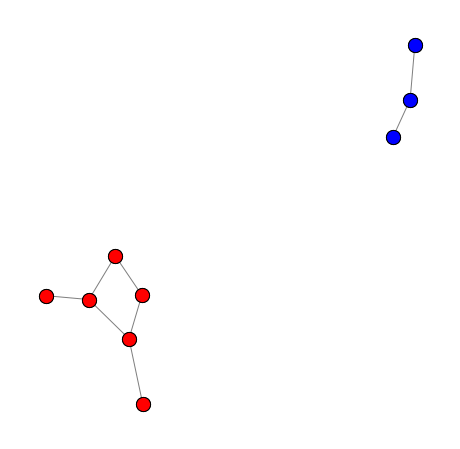

In [ ]:
from cdlib import viz

# fig,ax = plt.subplots(1,1, figsize=(10,10))
size = 4

pos = nx.spring_layout(G_k)
count = 0
total_c = []
coms = algorithms.louvain(G_k)
coms.communities = coms1
viz.plot_network_clusters(G_k, coms, pos)

In [ ]:
kpl.groupby('com_n')[['bid_price', 'cv_price', 'cv_bidding', 'coherence', 'exclusivity']].mean()

,bid_price,cv_price,cv_bidding,coherence,exclusivity
com_n,,,,,
523,0.995475,0.000352,0.003131,0.962110,1.0
4375,0.999465,0.000023,0.000272,0.942808,1.0


Ohio Milk Market

In [ ]:
import pandas as pd
auctions = pd.read_csv("/content/drive/MyDrive/Maria Mitrankova/ohio_milk_data.csv")

In [ ]:
auctions.shape

(7004, 11)

In [ ]:
gr = auctions[['firm', 'contract_id']]
gr_ns = gr[gr.groupby('contract_id')['contract_id'].transform('size') > 1]
gr_ns.shape

(5391, 2)

In [ ]:
G_nw = nx.Graph()
G_nw.add_nodes_from(gr_ns['firm'], bipartite=0)
dct  = gr_ns.groupby('contract_id')['firm'].apply(list).to_dict()
for a in dct:
  for i in range(len(dct[a])):
    for j in range(i+1, len(dct[a])):
      if G_nw.has_edge(dct[a][i], dct[a][j]):
                # we added this one before, just increase the weight by one
        G_nw[dct[a][i]][dct[a][j]]['weight'] += 1
      else:
                # new edge. add with weight=1
        G_nw.add_edge(dct[a][i], dct[a][j], weight=1)
len(G_nw) 

110

In [ ]:
gr_no_c = auctions[auctions['is_cartel_firm'] == 0][['firm', 'contract_id']]

In [ ]:
firms = auctions[auctions['is_cartel_firm'] == 1]['firm'].unique().tolist()

In [ ]:
for e in G_nw.edges:
  G_nw[e[0]][e[1]]['weight'] /= (G_nw.degree(e[0], weight='weight') + G_nw.degree(e[1], weight='weight') - G_nw[e[0]][e[1]]['weight'])

In [ ]:
coms_55 = algorithms.louvain(G_nw)
print(len(coms_55.communities))
print(len(coms_55.communities[0]))

7
27


In [ ]:
for i in range(7):
  print(len(coms_55.communities[i]))

25
23
16
15
11
11
5


In [ ]:
import numpy as np
from tqdm import tqdm 

coherence = []
for c in tqdm(coms_55.communities):
  com = G_nw.subgraph(c).copy()
  w = []
  for e in com.edges():
    w.append(com.get_edge_data(*e)['weight'])
  w = np.array(w, dtype=np.float64)
  ch = np.prod(w) ** (1/len(w)) / np.mean(w)
  coherence.append(ch)


100%|██████████| 7/7 [00:00<00:00, 997.15it/s]


In [ ]:
com = G_nw.subgraph(firms).copy()
w = list()
for e in com.edges():
  w.append(com.get_edge_data(*e)['weight'])
w = np.array(w)
ch = np.prod(w) ** (1/len(w)) / np.mean(w)
coherence.append(ch)


In [ ]:
coherence

[0.292237573673576,
 0.40247833891573004,
 0.7930064141590096,
 0.4478013778612882,
 0.2923554071605015,
 0.5989012506152817,
 0.957248629164196,
 0.9504158349825812]

In [ ]:
exclusivity = []
for i in tqdm(range(7)):
  # firms = auctions[auctions['com_n'] == i]['participant_inn'].unique().tolist()
  ex = nx.conductance(G_nw, coms_55.communities[i], weight='weight')
  exclusivity.append(1 - ex)

100%|██████████| 7/7 [00:00<00:00, 1131.98it/s]


In [ ]:
ex = nx.conductance(G_nw, firms, weight='weight')
exclusivity.append(1 - ex)

In [ ]:
stable[6]

0.17680860985262548

In [ ]:
from tqdm import tqdm
import numpy as np 

stabls1 = []
for i in tqdm(range(len(coms_55.communities))):
  stabls1.append(stability(coms_55.communities[i]))
  auctions.loc[auctions['firm'].isin(coms_55.communities[i]), ['com_n']] = i

100%|██████████| 7/7 [00:00<00:00, 54.05it/s]


In [ ]:
stabls = np.array(stabls1)
mylen = np.vectorize(len)
mysum = np.vectorize(sum)
print(stabls)
stable = [sum(stabls[i])/len(stabls[i]) for i in range(7)]
mean_st = (mysum(stabls)/mylen(stabls)).mean()

[list([0.9723107291552371, 0.8351205970751799, 0.6450424087401715, 0.4760964213767252, 0.9503851206297298, 0.9803777525359635, 0.7030077927083431, 0.998773873182599, 0.7157443489731997])
 list([0.9352875591071736, 0.45950377478429627, 0.3613881813557684, 0.8805877589174977, 0.8564034463640282, 0.9721557474536037, 0.9906633839803667, 0.39120275304749397, 0.39539628248187214])
 list([0.8350939520068612, 0.8736016849332897, 0.9579377988208321, -0.06470171182920291, 0.0, 0.28607724589212336, 0.580229351907866])
 list([0.9996701972927422, 0.7385465122580765, 0.8032964721973995, 0.9115371260262481, 0.8777551407776081, 0.775880800597465, 0.18812959155118758, 0.17255365679259455, 0.752910906494965])
 list([0.9999775405505467, 0.6610350702446839, 0.9977949467959654, 0.9999999999685776, 0.6227707073656391, 0.6246234848121438, 0.9997953323567261, 0.6239265977476993, 0.6247715891928395])
 list([-0.165452206337655, 0.2769454137700796, 0.9999999866310163, -0.014295549692800592, -0.0671729822750318, 

In [ ]:
mean_st = stable.mean()

(array([1., 1., 0., 0., 1., 0., 2., 0., 2., 1.]),
 array([0.17680861, 0.25396654, 0.33112446, 0.40828239, 0.48544032,
        0.56259824, 0.63975617, 0.7169141 , 0.79407202, 0.87122995,
        0.94838788]),
 <a list of 10 Patch objects>)

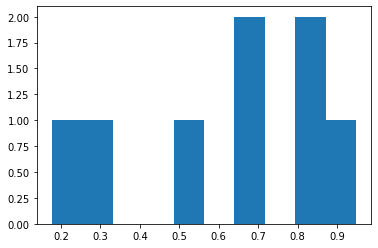

In [ ]:
import matplotlib.pyplot as plt

plt.hist(stable)

In [ ]:
stabls_c = stability(firms)
car_s = sum(stabls_c)/len(stabls_c)

In [ ]:
stable.append(car_s)
sum(stable)/len(stable)

0.6090157109364975

In [ ]:
stable

[0.8085398938196832,
 0.6936209874991223,
 0.4954626173902527,
 0.6911422671098095,
 0.7949661410038691,
 0.26319729553280374,
 0.17680860985262548,
 0.9483878752838135]

In [ ]:
exclusivity = np.array(exclusivity)
coherence = np.array(coherence)
stable = np.array(stable)

Text(0.85, 0.9, 'cartel')

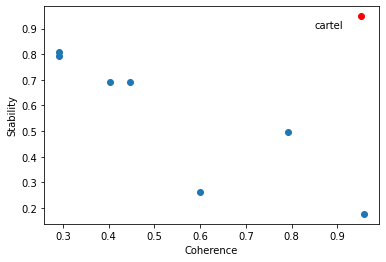

In [ ]:
fig, ax = plt.subplots(1,1)
ax.scatter(coherence[:-1], stable[:-1], label='Normal Groups')
ax.scatter(coherence[-1], stable[-1], color='red', label='Cartel group')
ax.set_xlabel("Coherence")
ax.set_ylabel("Stability")
# ax.legend()
ax.annotate('cartel', (coherence[-1], stable[-1]), xytext=(0.85, 0.9))